Problem 2.	Find information on the exchange rates for the last year and load this information into the program in accordance with your variant. Display the result as a graph using any available graphical output program

Problem 3.	Find the maximum, minimum and average rate for the considered period. Find the median. 

Problem 4.	Calculate the average rates of the currencies for each month and display the results in the form of graphs. Place daily rate charts and monthly averages on the same picture.

Problem 5.	Compute parameters a and b and draw a graph of the linear function Y (k) = ak + b, which best approximates the graphs of the exchange rates 

Problem 6. Interpolate the given values. Use interpolation methods described below. To solve the problem you need to find all the interpolated values for all indices with some small step, for example 0.01. Set the random values not bigger than 100 by absolute value:

In [3]:
# import requests

# url = 'https://api.exchangerate.host/timeseries'
# response = requests.get(url)
# data = response.json()

# print(data)

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
def year_rates(amount, currency, converted_currency, amount_of_days):
    today_date = (datetime.datetime.now() - datetime.timedelta(days=1 * (304 + 19)))
    print(today_date)
    date_1year = (today_date - datetime.timedelta(days=1 * amount_of_days))
    print(date_1year)
    url = f'https://api.exchangerate.host/timeseries'
    payload = {'base': currency, 'amount': amount, 'start_date': date_1year.date(), 
               'end_date': today_date.date()}
    response = requests.get(url, params=payload)
    data = response.json()
    
    currency_history = {}
    rate_history_array = []
#     rate_history_array_month = []
    b = []
    
    for item in data['rates']:
        current_date = item
        currency_rate = data['rates'][item][converted_currency]
#         print(item)
        currency_history[current_date] = [currency_rate]
        rate_history_array.append(currency_rate)
        print(currency_rate)
#         print(current_data)
#         b.append(current_date)
#         print(currency_rate)
    
#     print(type(currency_history[0]))
    pd_data = pd.DataFrame(currency_history).transpose()
    pd_data.columns = ['Rate']
    pd.set_option('display.max_rows', None)
    print(pd_data)
#     print(b)
#     print('\n')
#     print(rate_history_array)
    
    largest_so_far = rate_history_array[0]
    smallest_so_far = rate_history_array[0]
    sum_of_els = 0
    count = 0
    for i in rate_history_array:
        sum_of_els = sum_of_els + i
        count = count + 1
        if largest_so_far < i:
            largest_so_far = i
        if smallest_so_far > i:
            smallest_so_far = i
    average = sum_of_els / count

#     print(f'Maximum value is {largest_so_far}')
    
#     print(f'Minimum value is {smallest_so_far}')
    
#     print(f'Average is {average}')

#     if (count % 2 == 0):
#         print(f'Median for an even number of sequence {(rate_history_array[count/2] + rate_history_array[(count/2)+1])/2}')
#     else:
#         print(f'Median for an odd number of sequence {rate_history_array[(count/2)+1]}')
#     print(f'Median is {statistics.median(rate_history_array)}')
    
#     integers_list = []
#     for i in range(1, 366):
#         integers_list.append(i)
    
#     print(integers_list)
    
#     regressor = LinearRegression()
#     regressor.fit(rate_history_array)
    
    plt.plot(rate_history_array)
#     plt.plot(rate_history_array, regressor.predict(rate_history_array), color='blue')
    plt.ylabel(f'{amount} {currency} to {converted_currency}')
    plt.xlabel('Days')
#     plt.title(f'Current rate for {amount} {currency} to {converted_currency} is {rate_history_array[-1]}')
#     plt.tight_layout()
    plt.show()

2020-12-31 14:40:18.533859
2019-12-31 14:40:18.533859
69.4553
69.4462
68.9868
68.9288
68.9288
68.9288
69.2792
69.1879
69.1659
68.1025
68.1059
68.1059
68.1059
67.016
68.1242
68.3086
68.4526
68.6846
68.6846
68.6846
68.2939
68.3447
68.6181
68.7186
68.4555
68.4555
68.4555
68.5147
69.3435
68.6051
68.8808
69.7264
69.7264
69.7264
70.7882
70.4532
69.5068
69.1499
69.5076
69.5076
69.5076
70.1699
69.9618
69.1806
68.8603
68.9786
68.9786
68.9786
68.9805
68.8073
68.9627
68.6856
69.2126
69.2126
69.2126
69.5373
70.8362
71.0413
71.2531
72.9321
72.9321
72.9321
73.8403
73.9948
73.9906
73.8131
75.8286
75.8286
75.8286
81.9552
85.1357
80.772
82.5472
83.6491
83.6491
83.6491
81.0543
83.2701
82.7629
88.6832
84.4544
84.4544
84.4544
85.0686
85.5338
84.4963
85.2892
85.4711
85.4711
85.4711
87.4342
87.8168
86.5761
86.3696
83.6628
83.6628
83.6628
83.0258
82.0698
82.0453
81.5456
81.1969
81.1969
81.1969
80.6633
80.338
80.2428
81.7162
80.0185
80.0185
80.0185
80.4903
82.0099
83.616
82.0247
80.5116
80.5116
80.5116
80.639

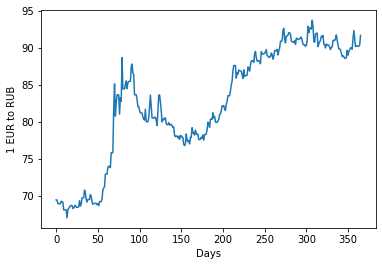

In [7]:
year_rates(1, 'EUR', 'RUB', 366)